In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [2]:
#reading csv file
df = pd.read_csv('weather.csv')
df.head(20)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
5,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,E,20.0,...,57,1023.8,1021.7,7,5,10.9,14.8,No,0.2,No
6,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,ESE,19.0,...,47,1024.6,1022.2,4,6,12.4,17.3,No,0.0,No
7,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,E,11.0,...,57,1026.2,1024.2,6,7,12.1,15.5,No,0.0,No
8,8.8,19.5,0.0,4.0,4.1,S,48.0,E,ENE,19.0,...,48,1026.1,1022.7,7,7,14.1,18.9,No,16.2,Yes
9,8.4,22.8,16.2,5.4,7.7,E,31.0,S,ESE,7.0,...,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No


In [3]:
df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         3
WindGustSpeed    2
WindSpeed9am     7
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [4]:
df.dropna(subset = ['Sunshine','WindGustSpeed','WindSpeed9am'],inplace=True)


In [5]:
df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [6]:
x = df.drop(['WindGustDir','WindDir9am','WindDir3pm','RISK_MM','RainTomorrow','RainToday'],axis = 'columns')

#x = df[['MinTemp','MaxTemp','Sunshine','WindGustSpeed','Humidity3pm','Temp3pm']]

y_s = df['RainToday']
print(x)


     MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        8.0     24.3       0.0          3.4       6.3           30.0   
1       14.0     26.9       3.6          4.4       9.7           39.0   
2       13.7     23.4       3.6          5.8       3.3           85.0   
3       13.3     15.5      39.8          7.2       9.1           54.0   
4        7.6     16.1       2.8          5.6      10.6           50.0   
..       ...      ...       ...          ...       ...            ...   
361      9.0     30.7       0.0          7.6      12.1           76.0   
362      7.1     28.4       0.0         11.6      12.7           48.0   
363     12.5     19.9       0.0          8.4       5.3           43.0   
364     12.5     26.9       0.0          5.0       7.1           46.0   
365     12.3     30.2       0.0          6.0      12.6           78.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0             6.0            20           68     

In [7]:
print(y_s)

0       No
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
361     No
362     No
363     No
364     No
365     No
Name: RainToday, Length: 354, dtype: object


In [8]:
num = LabelEncoder()

y = num.fit_transform(df['RainToday'])

df['RainToday'] = y
y = df['RainToday']


In [9]:
x = x.head(300)
y = y.head(300)

In [10]:
classifier = GaussianNB() 

In [11]:
classifier.fit(x,y)

GaussianNB()

In [19]:
classifier.score(x,y)

0.95

In [18]:
classifier.predict([[8,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6]])

array([0])

In [14]:
classifier.predict([[13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2 ]])

array([1])

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
x = x.head(10)
y = y.head(10)

<AxesSubplot:xlabel='MinTemp', ylabel='count'>

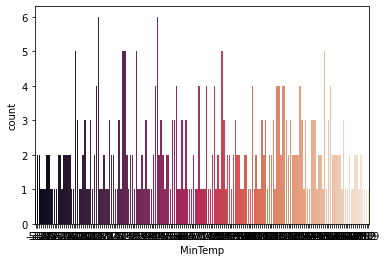

In [28]:
sns.countplot(data = df , x = 'MinTemp',palette='rocket')

<AxesSubplot:xlabel='MinTemp', ylabel='RainToday'>

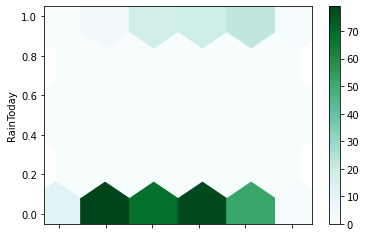

In [31]:
df.plot.hexbin(x='MinTemp',y='RainToday',gridsize=5)